In [1]:
# pip install mlxtend

import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint
from scipy import stats
import itertools

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

from mlxtend.classifier import StackingClassifier
from mlxtend.regressor import StackingRegressor



# Text - visualization
from wordcloud import WordCloud, STOPWORDS 

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score

In [2]:
# Stacking ***************************************************************************

In [2]:
# Loading dataset and view a few records.
df = pd.read_csv('E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
# Train test split

attributes = list(df.columns[:8])

X = df[attributes].values
y = df['Outcome'].values    

# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [6]:
# base estimators
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

# meta estimator
lr   = LogisticRegression()

In [8]:
# instantiate the stacking model
sclf = StackingClassifier(classifiers     = [clf1, clf2, clf3], 
                          meta_classifier = lr)

In [8]:
print('3-fold cross validation:\n')

3-fold cross validation:



In [9]:
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):
    
    scores = cross_val_score(clf, 
                             X, 
                             y, 
                             cv=3, 
                             scoring='accuracy')
    
    
    #print(scores)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), 
             scores.std(), 
             label))

Accuracy: 0.67 (+/- 0.02) [KNN]
Accuracy: 0.73 (+/- 0.01) [Random Forest]
Accuracy: 0.74 (+/- 0.03) [Naive Bayes]
Accuracy: 0.67 (+/- 0.02) [StackingClassifier]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

ValueError: query data dimension must match training data dimension

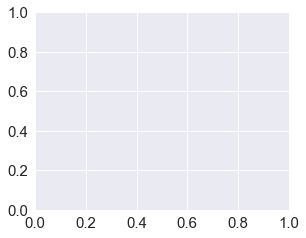

In [12]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X[:,:2], y=y, clf=clf)
    plt.title(lab)

In [11]:
# scaling the samples

colnames = X_train.columns

array_train = X_train.values
array_val   = X_val.values
array_test  = X_test.values

scaler = StandardScaler()

scaler.fit(array_train)
rescaledX_train = scaler.transform(array_train)

scaler = StandardScaler()

scaler.fit(array_val)
rescaledX_val = scaler.transform(array_val)

scaler = StandardScaler()

scaler.fit(array_test)
rescaledX_test = scaler.transform(array_test)

X_train = pd.DataFrame(rescaledX_train, columns=colnames)
X_val   = pd.DataFrame(rescaledX_val,   columns=colnames)
X_test  = pd.DataFrame(rescaledX_test,  columns=colnames)